## Prepare functions

In [ ]:
!git clone https://github.com/Ezagoskin/ECom-Bench.git

fatal: destination path 'ECom-Bench' already exists and is not an empty directory.


In [ ]:
%cd ECom-Bench

/content/ECom-Bench


In [ ]:
!pip install -r requirements.txt

In [ ]:
!pip install openai

In [ ]:
import os
from google.colab import files
import numpy as np
import pandas as pd
from math import comb
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline, BSpline


os.environ["DEEPSEEK_API_KEY"] = "SECRET_KEY"
os.environ["DEEPSEEK_BASE_URL"] = "https://api.deepseek.com/v1"
os.environ["OPENAI_API_KEY"] = "SECRET_KEY"
os.environ["OPENAI_BASE_URL"] = "https://api.aitunnel.ru/v1/"

In [ ]:
# get an array mapping tasks success
def parse(s):
    r = s.split('-------------------')
    res = []
    for t in r:
        t = t.split()
        res_t = [[int(t[3 + 2*i][8:]), (1 if t[2 + 2*i] == '✅' else 0)] for i in range(53)]
        res_t = list(map(lambda x: x[1], sorted(res_t, key=lambda x:x[0])))
        res.append(res_t)
    return np.array(res)

# calculate pass_k from tasks success map
def pass_k(res, k):
    pass_ks = np.zeros(53)
    for i in range(53):
        c = sum(res[:, i])
        n = len(res[:, i])
        pass_ks[i] = comb(c, k) / comb(n, k)
    return round(100 *  pass_ks.mean().item(), 2)

## Models

### deepseek-v3

In [ ]:
!python run.py --env story --user-model deepseek-v3 --agent-model deepseek-v3 --num-trials 8

Streaming output truncated to the last 5000 lines.
  File "/usr/lib/python3.12/asyncio/base_events.py", line 799, in call_soon
    self._check_closed()
  File "/usr/lib/python3.12/asyncio/base_events.py", line 545, in _check_closed
    raise RuntimeError('Event loop is closed')
RuntimeError: Event loop is closed
Trial 6 tasks ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸━━━━━  87% 0:01:152026-02-11 01:29:17,152 - mcp.server.lowlevel.server - INFO - Processing request of type CallToolRequest
Trial 6 tasks ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸━━━━━  87% 0:01:152026-02-11 01:29:17,503 - mcp.server.lowlevel.server - INFO - Processing request of type CallToolRequest
Trial 6 tasks ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸━━━━━  87% 0:01:152026-02-11 01:29:17,606 - mcp.server.lowlevel.server - INFO - Processing request of type CallToolRequest
Trial 6 tasks ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸━━━━━  87% 0:01:152026-02-11 01:29:17,768 - mcp.server.lowlevel.server - INFO - Processing request of type CallToolReques

In [ ]:
s = '''
Trial 1：

 ✅ task_id=1  ❌ task_id=5  ✅ task_id=2  ✅ task_id=7  ✅ task_id=4  ❌
task_id=9  ✅ task_id=3  ❌ task_id=6  ❌ task_id=8  ❌ task_id=0
 ❌ task_id=10  ✅ task_id=11  ✅ task_id=13  ❌ task_id=14  ❌ task_id=12  ❌
task_id=15  ❌ task_id=19  ✅ task_id=17  ❌ task_id=16  ✅ task_id=20
 ❌ task_id=25  ❌ task_id=18  ❌ task_id=27  ✅ task_id=23  ✅ task_id=21  ❌
task_id=26  ❌ task_id=30  ✅ task_id=28  ❌ task_id=24  ❌ task_id=31
 ❌ task_id=22  ✅ task_id=29  ❌ task_id=32  ✅ task_id=34  ✅ task_id=35  ❌
task_id=36  ✅ task_id=33  ✅ task_id=37  ❌ task_id=41  ❌ task_id=40
 ❌ task_id=38  ❌ task_id=39  ✅ task_id=42  ✅ task_id=44  ✅ task_id=43  ❌
task_id=45  ❌ task_id=46  ✅ task_id=47  ✅ task_id=49  ✅ task_id=48
 ❌ task_id=50  ✅ task_id=52  ❌ task_id=51

-------------------

Trial 2：

 ❌ task_id=2  ✅ task_id=1  ❌ task_id=6  ✅ task_id=7  ❌ task_id=4  ✅
task_id=5  ❌ task_id=8  ❌ task_id=9  ❌ task_id=0  ✅ task_id=3
 ❌ task_id=11  ❌ task_id=13  ❌ task_id=14  ❌ task_id=10  ❌ task_id=12  ❌
task_id=20  ✅ task_id=15  ❌ task_id=17  ❌ task_id=18  ✅ task_id=16
 ✅ task_id=19  ❌ task_id=25  ❌ task_id=21  ✅ task_id=27  ❌ task_id=23  ❌
task_id=24  ✅ task_id=22  ✅ task_id=30  ✅ task_id=28  ❌ task_id=29
 ✅ task_id=32  ❌ task_id=31  ❌ task_id=26  ❌ task_id=37  ✅ task_id=35  ❌
task_id=36  ❌ task_id=39  ✅ task_id=38  ✅ task_id=41  ✅ task_id=34
 ✅ task_id=33  ❌ task_id=42  ❌ task_id=40  ❌ task_id=45  ❌ task_id=43  ❌
task_id=49  ✅ task_id=47  ✅ task_id=44  ❌ task_id=46  ❌ task_id=48
 ✅ task_id=52  ❌ task_id=50  ❌ task_id=51

-------------------

Trial 3：

 ❌ task_id=2  ✅ task_id=5  ❌ task_id=6  ❌ task_id=4  ✅ task_id=1  ✅
task_id=7  ❌ task_id=9  ❌ task_id=0  ✅ task_id=3  ❌ task_id=8
 ❌ task_id=11  ✅ task_id=13  ❌ task_id=14  ❌ task_id=18  ✅ task_id=10  ❌
task_id=12  ❌ task_id=17  ✅ task_id=16  ✅ task_id=20  ❌ task_id=15
 ❌ task_id=19  ❌ task_id=25  ✅ task_id=27  ❌ task_id=30  ❌ task_id=24  ❌
task_id=21  ✅ task_id=28  ❌ task_id=23  ❌ task_id=26  ❌ task_id=22
 ✅ task_id=29  ✅ task_id=31  ✅ task_id=32  ❌ task_id=37  ❌ task_id=34  ✅
task_id=38  ✅ task_id=36  ❌ task_id=39  ✅ task_id=33  ✅ task_id=35
 ❌ task_id=40  ❌ task_id=41  ✅ task_id=42  ✅ task_id=44  ✅ task_id=47  ✅
task_id=45  ❌ task_id=50  ❌ task_id=43  ❌ task_id=46  ✅ task_id=49
 ❌ task_id=48  ❌ task_id=51  ✅ task_id=52

-------------------

Trial 4：

 ✅ task_id=1  ✅ task_id=4  ✅ task_id=7  ✅ task_id=2  ❌ task_id=5  ✅
task_id=6  ❌ task_id=9  ✅ task_id=3  ✅ task_id=0  ✅ task_id=8
 ❌ task_id=11  ❌ task_id=13  ✅ task_id=14  ✅ task_id=10  ❌ task_id=12  ✅
task_id=20  ❌ task_id=18  ❌ task_id=15  ❌ task_id=19  ❌ task_id=17
 ❌ task_id=27  ❌ task_id=25  ❌ task_id=16  ❌ task_id=23  ❌ task_id=24  ✅
task_id=28  ❌ task_id=21  ❌ task_id=22  ✅ task_id=29  ❌ task_id=26
 ❌ task_id=30  ✅ task_id=31  ✅ task_id=32  ✅ task_id=35  ✅ task_id=33  ❌
task_id=37  ❌ task_id=39  ❌ task_id=36  ❌ task_id=34  ❌ task_id=42
 ❌ task_id=40  ❌ task_id=38  ❌ task_id=41  ❌ task_id=47  ✅ task_id=44  ✅
task_id=43  ✅ task_id=45  ❌ task_id=46  ❌ task_id=50  ✅ task_id=49
 ✅ task_id=52  ❌ task_id=48  ❌ task_id=51

-------------------

Trial 5：

 ✅ task_id=1  ✅ task_id=6  ❌ task_id=2  ❌ task_id=5  ❌ task_id=7  ❌
task_id=4  ❌ task_id=0  ✅ task_id=3  ❌ task_id=8  ❌ task_id=9
 ✅ task_id=11  ❌ task_id=13  ✅ task_id=14  ❌ task_id=12  ✅ task_id=10  ❌
task_id=19  ✅ task_id=20  ❌ task_id=15  ❌ task_id=17  ❌ task_id=18
 ✅ task_id=16  ❌ task_id=25  ❌ task_id=27  ❌ task_id=21  ❌ task_id=24  ✅
task_id=22  ❌ task_id=29  ✅ task_id=23  ✅ task_id=28  ❌ task_id=26
 ✅ task_id=31  ❌ task_id=30  ❌ task_id=32  ❌ task_id=37  ✅ task_id=35  ❌
task_id=34  ❌ task_id=39  ✅ task_id=36  ❌ task_id=38  ❌ task_id=33
 ✅ task_id=41  ❌ task_id=40  ✅ task_id=42  ❌ task_id=43  ✅ task_id=44  ❌
task_id=45  ❌ task_id=47  ❌ task_id=46  ❌ task_id=50  ❌ task_id=52
 ✅ task_id=49  ❌ task_id=48  ❌ task_id=51

-------------------

Trial 6：

 ✅ task_id=1  ❌ task_id=2  ✅ task_id=7  ✅ task_id=5  ✅ task_id=0  ❌
task_id=4  ❌ task_id=9  ❌ task_id=8  ❌ task_id=6  ❌ task_id=11
 ❌ task_id=3  ❌ task_id=13  ✅ task_id=14  ✅ task_id=10  ❌ task_id=12  ❌
task_id=17  ❌ task_id=19  ❌ task_id=16  ❌ task_id=25  ❌ task_id=18
 ❌ task_id=15  ✅ task_id=27  ✅ task_id=20  ❌ task_id=23  ❌ task_id=21  ❌
task_id=24  ❌ task_id=30  ✅ task_id=28  ❌ task_id=22  ❌ task_id=26
 ✅ task_id=29  ✅ task_id=31  ❌ task_id=34  ❌ task_id=32  ❌ task_id=33  ❌
task_id=37  ✅ task_id=35  ✅ task_id=38  ✅ task_id=39  ❌ task_id=36
 ✅ task_id=43  ❌ task_id=40  ❌ task_id=41  ✅ task_id=42  ✅ task_id=45  ✅
task_id=44  ✅ task_id=47  ❌ task_id=46  ✅ task_id=48  ✅ task_id=52
 ❌ task_id=49  ❌ task_id=50  ❌ task_id=51

-------------------

Trial 7：

 ✅ task_id=1  ❌ task_id=2  ✅ task_id=5  ❌ task_id=0  ❌ task_id=3  ✅
task_id=7  ❌ task_id=4  ❌ task_id=8  ❌ task_id=9  ❌ task_id=6
 ✅ task_id=11  ✅ task_id=13  ✅ task_id=10  ❌ task_id=12  ✅ task_id=14  ❌
task_id=15  ✅ task_id=17  ❌ task_id=19  ✅ task_id=20  ❌ task_id=16
 ❌ task_id=18  ❌ task_id=25  ❌ task_id=27  ❌ task_id=21  ✅ task_id=29  ✅
task_id=28  ❌ task_id=30  ❌ task_id=24  ✅ task_id=32  ✅ task_id=31
 ❌ task_id=26  ❌ task_id=22  ❌ task_id=23  ✅ task_id=35  ❌ task_id=37  ❌
task_id=36  ✅ task_id=38  ❌ task_id=34  ✅ task_id=33  ✅ task_id=39
 ❌ task_id=40  ✅ task_id=42  ❌ task_id=41  ✅ task_id=43  ✅ task_id=44  ✅
task_id=45  ✅ task_id=47  ❌ task_id=46  ❌ task_id=50  ❌ task_id=48
 ❌ task_id=51  ✅ task_id=52  ✅ task_id=49

-------------------

Trial 8：

 ❌ task_id=1  ❌ task_id=4  ❌ task_id=5  ❌ task_id=2  ❌ task_id=6  ✅
task_id=0  ❌ task_id=7  ❌ task_id=8  ✅ task_id=3  ❌ task_id=9
 ✅ task_id=11  ❌ task_id=10  ❌ task_id=13  ❌ task_id=12  ✅ task_id=20  ✅
task_id=14  ❌ task_id=16  ❌ task_id=19  ❌ task_id=17  ❌ task_id=18
 ✅ task_id=15  ❌ task_id=25  ❌ task_id=23  ❌ task_id=24  ❌ task_id=21  ✅
task_id=27  ✅ task_id=30  ❌ task_id=22  ✅ task_id=28  ❌ task_id=32
 ✅ task_id=29  ❌ task_id=37  ❌ task_id=26  ❌ task_id=31  ❌ task_id=36  ❌
task_id=34  ❌ task_id=38  ✅ task_id=35  ❌ task_id=33  ❌ task_id=39
 ❌ task_id=40  ✅ task_id=42  ❌ task_id=41  ❌ task_id=43  ✅ task_id=45  ✅
task_id=44  ✅ task_id=47  ❌ task_id=46  ❌ task_id=49  ✅ task_id=48
 ❌ task_id=50  ✅ task_id=52  ❌ task_id=51
 '''

In [ ]:
res = parse(s)
print(res)
res.shape

[[0 1 1 1 1 0 0 1 0 0 0 1 0 1 0 0 0 1 0 0 1 1 0 1 0 0 0 0 1 1 0 0 0 1 1 1
  0 1 0 0 0 0 1 1 1 0 0 1 1 1 0 0 1]
 [0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 1 1 0 1 0 1 1 1 1
  0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 0 1]
 [0 1 0 1 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 0 1 1 1 0 1
  1 0 1 0 0 0 1 0 1 1 0 1 0 1 0 0 1]
 [1 1 1 1 1 0 1 1 1 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 1 1 1 0 1
  0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 0 1]
 [0 1 0 1 0 0 1 0 0 0 1 1 0 0 1 0 1 0 0 0 1 0 1 1 0 0 0 0 1 0 0 1 0 0 0 1
  1 0 0 0 0 1 1 0 1 0 0 0 0 1 0 0 0]
 [1 1 0 0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 0 1 0 0 0 1
  0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1]
 [0 1 0 0 0 1 0 1 0 0 1 1 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 0 1 1 1 0 1
  0 0 1 1 0 0 1 1 1 1 0 1 0 1 0 0 1]
 [1 0 0 1 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1
  0 0 0 0 0 0 1 0 1 1 0 1 1 0 0 0 1]]


(8, 53)

In [ ]:
pass_ks = [pass_k(res, k) for k in range(1,9)]
r1 = pass_ks
print('📈 Pass^k')
for k in range(1,9):
    print(f'k={k}: {pass_ks[k-1]}%')

📈 Pass^k
k=1: 39.86%
k=2: 23.05%
k=3: 15.53%
k=4: 11.48%
k=5: 9.0%
k=6: 7.41%
k=7: 6.37%
k=8: 5.66%


### llama-4-scout

In [ ]:
!python run.py --env story --user-model deepseek-v3 --agent-model llama-4-scout --num-trials 4

Streaming output truncated to the last 5000 lines.
    await self._close_connections(closing_connections)
  File 
"/usr/local/lib/python3.12/dist-packages/httpcore/_async/connection_pool.py", 
line 345, in _close_connections
    await connection.aclose()
  File "/usr/local/lib/python3.12/dist-packages/httpcore/_async/connection.py", 
line 173, in aclose
    await self._connection.aclose()
  File "/usr/local/lib/python3.12/dist-packages/httpcore/_async/http11.py", line
258, in aclose
    await self._network_stream.aclose()
  File "/usr/local/lib/python3.12/dist-packages/httpcore/_backends/anyio.py", 
line 53, in aclose
    await self._stream.aclose()
  File "/usr/local/lib/python3.12/dist-packages/anyio/streams/tls.py", line 241,
in aclose
    await self.transport_stream.aclose()
  File "/usr/local/lib/python3.12/dist-packages/anyio/_backends/_asyncio.py", 
line 1329, in aclose
    self._transport.close()
  File "/usr/lib/python3.12/asyncio/selector_events.py", line 1213, in close
    s

In [ ]:
!zip -r /content/results.zip /content/ECom-Bench/results
files.download('/content/results.zip')

updating: content/ECom-Bench/results/ (stored 0%)
  adding: content/ECom-Bench/results/user-deepseek-v3_agent-llama-4-scout_env-story_range_0--1_0211032044.json (deflated 78%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!python run.py --env story --user-model deepseek-v3 --agent-model llama-4-scout --num-trials 4

In [ ]:
s = '''
Trial 1：

 ❌ task_id=5  ❌ task_id=1  ❌ task_id=9  ❌ task_id=7  ❌ task_id=8  ❌
task_id=2  ❌ task_id=4  ❌ task_id=6  ❌ task_id=0  ❌ task_id=10
 ❌ task_id=3  ❌ task_id=15  ❌ task_id=11  ❌ task_id=13  ❌ task_id=12  ❌
task_id=18  ❌ task_id=19  ❌ task_id=14  ❌ task_id=21  ❌ task_id=16
 ❌ task_id=24  ❌ task_id=20  ❌ task_id=25  ❌ task_id=17  ❌ task_id=27  ❌
task_id=28  ❌ task_id=23  ❌ task_id=30  ❌ task_id=33  ❌ task_id=34
 ❌ task_id=35  ❌ task_id=29  ❌ task_id=31  ❌ task_id=26  ❌ task_id=32  ❌
task_id=36  ❌ task_id=38  ❌ task_id=40  ❌ task_id=41  ❌ task_id=37
 ✅ task_id=39  ❌ task_id=44  ❌ task_id=43  ❌ task_id=42  ❌ task_id=45  ❌
task_id=22  ❌ task_id=47  ❌ task_id=46  ❌ task_id=49  ❌ task_id=48
 ❌ task_id=50  ❌ task_id=52  ❌ task_id=51

-------------------

Trial 2：

 ❌ task_id=9  ❌ task_id=7  ❌ task_id=2  ❌ task_id=5  ❌ task_id=8  ❌
task_id=0  ❌ task_id=1  ❌ task_id=3  ❌ task_id=10  ❌ task_id=4
 ❌ task_id=11  ❌ task_id=12  ❌ task_id=6  ❌ task_id=13  ❌ task_id=16  ❌
task_id=15  ❌ task_id=18  ❌ task_id=19  ❌ task_id=14  ❌ task_id=17
 ❌ task_id=27  ❌ task_id=24  ❌ task_id=21  ❌ task_id=25  ❌ task_id=28  ❌
task_id=26  ❌ task_id=32  ❌ task_id=31  ❌ task_id=23  ❌ task_id=30
 ❌ task_id=33  ❌ task_id=34  ❌ task_id=35  ❌ task_id=29  ✅ task_id=39  ❌
task_id=37  ❌ task_id=43  ❌ task_id=40  ❌ task_id=36  ✅ task_id=41
 ❌ task_id=38  ❌ task_id=45  ❌ task_id=44  ❌ task_id=20  ❌ task_id=47  ❌
task_id=46  ❌ task_id=42  ❌ task_id=50  ❌ task_id=51  ❌ task_id=49
 ❌ task_id=52  ❌ task_id=48  ❌ task_id=22

-------------------

Trial 3：

 ❌ task_id=8  ❌ task_id=7  ❌ task_id=9  ❌ task_id=5  ❌ task_id=6  ❌
task_id=2  ❌ task_id=1  ❌ task_id=4  ❌ task_id=0  ❌ task_id=3
 ❌ task_id=16  ❌ task_id=10  ❌ task_id=13  ❌ task_id=14  ❌ task_id=12  ❌
task_id=11  ❌ task_id=18  ❌ task_id=20  ❌ task_id=19  ❌ task_id=22
 ❌ task_id=17  ❌ task_id=24  ❌ task_id=28  ❌ task_id=27  ❌ task_id=31  ❌
task_id=23  ❌ task_id=30  ❌ task_id=21  ❌ task_id=26  ❌ task_id=29
 ✅ task_id=32  ❌ task_id=33  ❌ task_id=35  ❌ task_id=38  ❌ task_id=34  ❌
task_id=37  ✅ task_id=39  ❌ task_id=36  ❌ task_id=40  ❌ task_id=47
 ❌ task_id=45  ❌ task_id=25  ❌ task_id=48  ❌ task_id=15  ❌ task_id=42  ❌
task_id=44  ❌ task_id=49  ❌ task_id=50  ✅ task_id=41  ❌ task_id=52
 ❌ task_id=51  ❌ task_id=43  ❌ task_id=46

-------------------

Trial 4：

 ❌ task_id=6  ❌ task_id=5  ❌ task_id=7  ❌ task_id=4  ❌ task_id=1  ❌
task_id=9  ❌ task_id=3  ❌ task_id=0  ❌ task_id=13  ❌ task_id=8
 ❌ task_id=11  ❌ task_id=12  ❌ task_id=18  ❌ task_id=10  ❌ task_id=20  ❌
task_id=21  ❌ task_id=14  ❌ task_id=19  ❌ task_id=23  ❌ task_id=22
 ❌ task_id=27  ❌ task_id=24  ❌ task_id=25  ❌ task_id=26  ❌ task_id=2  ❌
task_id=31  ❌ task_id=15  ❌ task_id=16  ❌ task_id=17  ❌ task_id=30
 ✅ task_id=32  ❌ task_id=37  ❌ task_id=33  ❌ task_id=35  ❌ task_id=36  ❌
task_id=34  ❌ task_id=29  ❌ task_id=28  ❌ task_id=39  ❌ task_id=38
 ✅ task_id=41  ❌ task_id=43  ❌ task_id=45  ❌ task_id=47  ❌ task_id=40  ❌
task_id=42  ❌ task_id=49  ❌ task_id=50  ❌ task_id=48  ❌ task_id=44
 ❌ task_id=46  ❌ task_id=52  ❌ task_id=51

-------------------

Trial 1：

 ❌ task_id=9  ❌ task_id=7  ❌ task_id=2  ❌ task_id=5  ❌ task_id=8  ❌
task_id=0  ❌ task_id=1  ❌ task_id=3  ❌ task_id=10  ❌ task_id=4
 ❌ task_id=11  ❌ task_id=12  ❌ task_id=6  ❌ task_id=13  ❌ task_id=16  ❌
task_id=15  ❌ task_id=18  ❌ task_id=19  ❌ task_id=14  ❌ task_id=17
 ❌ task_id=27  ❌ task_id=24  ❌ task_id=21  ❌ task_id=25  ❌ task_id=28  ❌
task_id=26  ✅ task_id=32  ❌ task_id=31  ❌ task_id=23  ❌ task_id=30
 ❌ task_id=33  ❌ task_id=34  ❌ task_id=35  ❌ task_id=29  ❌ task_id=39  ❌
task_id=37  ❌ task_id=43  ❌ task_id=40  ❌ task_id=36  ✅ task_id=41
 ❌ task_id=38  ❌ task_id=45  ❌ task_id=44  ❌ task_id=20  ❌ task_id=47  ❌
task_id=46  ❌ task_id=42  ❌ task_id=50  ❌ task_id=51  ❌ task_id=49
 ❌ task_id=52  ❌ task_id=48  ❌ task_id=22

-------------------

Trial 2：

 ❌ task_id=8  ❌ task_id=7  ❌ task_id=9  ❌ task_id=5  ❌ task_id=6  ❌
task_id=2  ❌ task_id=1  ❌ task_id=4  ❌ task_id=0  ❌ task_id=3
 ❌ task_id=16  ❌ task_id=10  ❌ task_id=13  ❌ task_id=14  ❌ task_id=12  ❌
task_id=11  ❌ task_id=18  ❌ task_id=20  ❌ task_id=19  ❌ task_id=22
 ❌ task_id=17  ❌ task_id=24  ❌ task_id=28  ❌ task_id=27  ❌ task_id=31  ❌
task_id=23  ❌ task_id=30  ❌ task_id=21  ❌ task_id=26  ❌ task_id=29
 ✅ task_id=32  ❌ task_id=33  ❌ task_id=35  ❌ task_id=38  ❌ task_id=34  ❌
task_id=37  ❌ task_id=39  ❌ task_id=36  ❌ task_id=40  ❌ task_id=47
 ✅ task_id=45  ❌ task_id=25  ❌ task_id=48  ❌ task_id=15  ❌ task_id=42  ❌
task_id=44  ❌ task_id=49  ❌ task_id=50  ✅ task_id=41  ❌ task_id=52
 ❌ task_id=51  ❌ task_id=43  ❌ task_id=46

-------------------

 Trial 3：

 ❌ task_id=5  ❌ task_id=1  ❌ task_id=9  ❌ task_id=7  ❌ task_id=8  ❌
task_id=2  ❌ task_id=4  ❌ task_id=6  ❌ task_id=0  ❌ task_id=10
 ❌ task_id=3  ❌ task_id=15  ❌ task_id=11  ❌ task_id=13  ❌ task_id=12  ❌
task_id=18  ❌ task_id=19  ❌ task_id=14  ❌ task_id=21  ❌ task_id=16
 ❌ task_id=24  ❌ task_id=20  ❌ task_id=25  ❌ task_id=17  ❌ task_id=27  ❌
task_id=28  ❌ task_id=23  ❌ task_id=30  ❌ task_id=33  ❌ task_id=34
 ❌ task_id=35  ❌ task_id=29  ❌ task_id=31  ❌ task_id=26  ❌ task_id=32  ❌
task_id=36  ❌ task_id=38  ❌ task_id=40  ✅ task_id=41  ❌ task_id=37
 ✅ task_id=39  ❌ task_id=44  ❌ task_id=43  ❌ task_id=42  ❌ task_id=45  ❌
task_id=22  ❌ task_id=47  ❌ task_id=46  ❌ task_id=49  ❌ task_id=48
 ❌ task_id=50  ❌ task_id=52  ❌ task_id=51

-------------------

Trial 4：

 ❌ task_id=6  ❌ task_id=5  ❌ task_id=7  ❌ task_id=4  ❌ task_id=1  ❌
task_id=9  ❌ task_id=3  ❌ task_id=0  ❌ task_id=13  ❌ task_id=8
 ❌ task_id=11  ❌ task_id=12  ❌ task_id=18  ❌ task_id=10  ❌ task_id=20  ❌
task_id=21  ❌ task_id=14  ❌ task_id=19  ❌ task_id=23  ❌ task_id=22
 ❌ task_id=27  ❌ task_id=24  ❌ task_id=25  ❌ task_id=26  ❌ task_id=2  ❌
task_id=31  ❌ task_id=15  ❌ task_id=16  ❌ task_id=17  ❌ task_id=30
 ❌ task_id=32  ❌ task_id=37  ❌ task_id=33  ❌ task_id=35  ❌ task_id=36  ❌
task_id=34  ❌ task_id=29  ❌ task_id=28  ✅ task_id=39  ❌ task_id=38
 ✅ task_id=41  ❌ task_id=43  ❌ task_id=45  ❌ task_id=47  ❌ task_id=40  ❌
task_id=42  ❌ task_id=49  ❌ task_id=50  ❌ task_id=48  ❌ task_id=44
 ❌ task_id=46  ❌ task_id=52  ❌ task_id=51
 '''

In [ ]:
res = parse(s)
print(res)
res.shape

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
  0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
  0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
  0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
  0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0]]


(8, 53)

In [ ]:
pass_ks = [pass_k(res, k) for k in range(1,9)]
r2 = pass_ks
print('📈 Pass^k')
for k in range(1,9):
    print(f'k={k}: {pass_ks[k-1]}%')

📈 Pass^k
k=1: 4.01%
k=2: 2.49%
k=3: 1.65%
k=4: 1.11%
k=5: 0.74%
k=6: 0.47%
k=7: 0.24%
k=8: 0.0%


### gpt-5-nano

In [ ]:
!python run.py --env story --user-model deepseek-v3 --agent-model gpt-5-nano --num-trials 4

Streaming output truncated to the last 5000 lines.
Trial 2 tasks ━━━━━━━━━━━━━━━━━━━━━━━━╺━━━━━━━━━━━━━━━  60% 0:09:442026-02-11 04:29:42,047 - mcp.server.lowlevel.server - INFO - Processing request of type CallToolRequest
2026-02-11 04:29:42,063 - mcp.server.lowlevel.server - INFO - Processing request of type CallToolRequest
Trial 2 tasks ━━━━━━━━━━━━━━━━━━━━━━━━╺━━━━━━━━━━━━━━━  60% 0:09:442026-02-11 04:29:43,979 - mcp.server.lowlevel.server - INFO - Processing request of type CallToolRequest
2026-02-11 04:29:43,996 - mcp.server.lowlevel.server - INFO - Processing request of type CallToolRequest
2026-02-11 04:29:44,021 - mcp.server.lowlevel.server - INFO - Processing request of type CallToolRequest
Trial 2 tasks ━━━━━━━━━━━━━━━━━━━━━━━━╺━━━━━━━━━━━━━━━  60% 0:09:442026-02-11 04:29:45,313 - mcp.server.lowlevel.server - INFO - Processing request of type CallToolRequest
2026-02-11 04:29:45,348 - mcp.server.lowlevel.server - INFO - Processing request of type CallToolRequest
Trial 2 tasks

In [ ]:
!zip -r /content/results.zip /content/ECom-Bench/results
files.download('/content/results.zip')

In [ ]:
!python run.py --env story --user-model deepseek-v3 --agent-model gpt-5-nano --num-trials 4

Streaming output truncated to the last 5000 lines.
  File "/usr/local/lib/python3.12/dist-packages/httpcore/_backends/anyio.py", 
line 53, in aclose
    await self._stream.aclose()
  File "/usr/local/lib/python3.12/dist-packages/anyio/streams/tls.py", line 241,
in aclose
    await self.transport_stream.aclose()
  File "/usr/local/lib/python3.12/dist-packages/anyio/_backends/_asyncio.py", 
line 1329, in aclose
    self._transport.close()
  File "/usr/lib/python3.12/asyncio/selector_events.py", line 1213, in close
    super().close()
  File "/usr/lib/python3.12/asyncio/selector_events.py", line 875, in close
    self._loop.call_soon(self._call_connection_lost, None)
  File "/usr/lib/python3.12/asyncio/base_events.py", line 799, in call_soon
    self._check_closed()
  File "/usr/lib/python3.12/asyncio/base_events.py", line 545, in _check_closed
    raise RuntimeError('Event loop is closed')
RuntimeError: Event loop is closed
Task exception was never retrieved
future: <Task finished name='

In [ ]:
!zip -r /content/results.zip /content/ECom-Bench/results
files.download('/content/results.zip')

  adding: content/ECom-Bench/results/ (stored 0%)
  adding: content/ECom-Bench/results/user-deepseek-v3_agent-gpt-5-nano_env-story_range_0--1_0211082642.json (deflated 73%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!python run.py --env story --user-model deepseek-v3 --agent-model gpt-5-nano --num-trials 1

Namespace(num_trials=1, env='story', user_model='deepseek-v3', 
user_strategy='based', agent_model='gpt-5-nano', agent_strategy='llm', 
start_index=0, end_index=-1, task_ids=None, log_dir='results', 
max_concurrency=10, seed=10, shuffle=0, verbose=False, max_time=600)
Running tasks 0 to 53 (checkpoint path: 
results/user-deepseek-v3_agent-gpt-5-nano_env-story_range_0--1_0211165736.json)
Trial 1 tasks ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━   0% -:--:--2026-02-11 16:57:49,874 - mcp.server.lowlevel.server - INFO - Processing request of type ListToolsRequest
Trial 1 tasks ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━   0% -:--:--2026-02-11 16:57:50,686 - mcp.server.lowlevel.server - INFO - Processing request of type ListToolsRequest
Trial 1 tasks ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━   0% -:--:--2026-02-11 16:57:50,886 - mcp.server.lowlevel.server - INFO - Processing request of type ListToolsRequest
Trial 1 tasks ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━   0% -:--:--2026-02-11 16:57:50,951 

In [ ]:
s = '''
Trial 1：

 ❌ task_id=4  ❌ task_id=3  ❌ task_id=5  ❌ task_id=7  ❌ task_id=0  ❌
task_id=9  ❌ task_id=1  ❌ task_id=10  ❌ task_id=2  ❌ task_id=6
 ❌ task_id=13  ⏰ task_id=8  ❌ task_id=12  ❌ task_id=14  ❌ task_id=16  ✅
task_id=15  ❌ task_id=11  ❌ task_id=20  ❌ task_id=19  ❌ task_id=18
 ❌ task_id=25  ✅ task_id=27  ❌ task_id=17  ❌ task_id=26  ❌ task_id=28  ❌
task_id=22  ❌ task_id=30  ❌ task_id=29  ❌ task_id=23  ❌ task_id=32
 ❌ task_id=21  ✅ task_id=35  ✅ task_id=31  ❌ task_id=36  ❌ task_id=37  ⏰
task_id=24  ❌ task_id=38  ❌ task_id=34  ❌ task_id=33  ❌ task_id=43
 ✅ task_id=45  ❌ task_id=44  ❌ task_id=40  ✅ task_id=42  ❌ task_id=41  ✅
task_id=47  ❌ task_id=46  ✅ task_id=52  ❌ task_id=50  ❌ task_id=49
 ⏰ task_id=39  ❌ task_id=51  ❌ task_id=48

-------------------

Trial 2：

 ❌ task_id=5  ❌ task_id=4  ❌ task_id=3  ❌ task_id=9  ❌ task_id=2  ❌
task_id=7  ❌ task_id=6  ❌ task_id=1  ❌ task_id=0  ❌ task_id=8
 ❌ task_id=11  ❌ task_id=12  ❌ task_id=17  ❌ task_id=10  ❌ task_id=14  ❌
task_id=13  ✅ task_id=15  ❌ task_id=19  ❌ task_id=20  ❌ task_id=21
 ❌ task_id=25  ❌ task_id=16  ❌ task_id=27  ❌ task_id=22  ❌ task_id=24  ⏰
task_id=18  ❌ task_id=29  ❌ task_id=30  ✅ task_id=31  ❌ task_id=32
 ❌ task_id=26  ❌ task_id=23  ❌ task_id=33  ❌ task_id=28  ✅ task_id=35  ❌
task_id=34  ❌ task_id=36  ❌ task_id=37  ❌ task_id=38  ❌ task_id=40
 ❌ task_id=44  ✅ task_id=45  ✅ task_id=42  ❌ task_id=43  ✅ task_id=47  ❌
task_id=39  ❌ task_id=49  ❌ task_id=50  ❌ task_id=46  ❌ task_id=48
 ❌ task_id=41  ✅ task_id=52  ❌ task_id=51

-------------------

Trial 3：

 ❌ task_id=5  ❌ task_id=6  ❌ task_id=9  ❌ task_id=1  ❌ task_id=4  ❌
task_id=7  ❌ task_id=2  ✅ task_id=8  ❌ task_id=10  ❌ task_id=3
 ❌ task_id=12  ⏰ task_id=0  ❌ task_id=14  ❌ task_id=13  ❌ task_id=17  ✅
task_id=15  ❌ task_id=11  ❌ task_id=18  ❌ task_id=21  ❌ task_id=20
 ✅ task_id=27  ❌ task_id=22  ⏰ task_id=16  ❌ task_id=28  ✅ task_id=19  ❌
task_id=25  ✅ task_id=31  ❌ task_id=32  ❌ task_id=29  ✅ task_id=30
 ❌ task_id=34  ❌ task_id=26  ⏰ task_id=23  ❌ task_id=37  ❌ task_id=35  ❌
task_id=36  ❌ task_id=24  ❌ task_id=38  ✅ task_id=42  ❌ task_id=43
 ❌ task_id=44  ❌ task_id=40  ✅ task_id=39  ❌ task_id=33  ✅ task_id=45  ❌
task_id=46  ❌ task_id=49  ✅ task_id=47  ✅ task_id=50  ✅ task_id=52
 ❌ task_id=41  ❌ task_id=51  ⏰ task_id=48

-------------------

Trial 4：

 ❌ task_id=5  ❌ task_id=2  ❌ task_id=3  ✅ task_id=4  ❌ task_id=1  ❌
task_id=9  ❌ task_id=6  ❌ task_id=0  ❌ task_id=7  ✅ task_id=8
 ❌ task_id=11  ❌ task_id=12  ✅ task_id=15  ✅ task_id=20  ❌ task_id=10  ❌
task_id=18  ❌ task_id=17  ❌ task_id=14  ❌ task_id=13  ✅ task_id=19
 ❌ task_id=21  ❌ task_id=25  ❌ task_id=16  ✅ task_id=27  ❌ task_id=26  ❌
task_id=28  ❌ task_id=29  ❌ task_id=30  ❌ task_id=32  ✅ task_id=34
 ❌ task_id=35  ✅ task_id=31  ❌ task_id=36  ❌ task_id=33  ❌ task_id=23  ⏰
task_id=22  ❌ task_id=37  ⏰ task_id=24  ❌ task_id=40  ❌ task_id=39
 ✅ task_id=42  ✅ task_id=45  ❌ task_id=43  ❌ task_id=48  ✅ task_id=47  ✅
task_id=41  ❌ task_id=46  ❌ task_id=50  ✅ task_id=52  ❌ task_id=44
 ❌ task_id=51  ⏰ task_id=38  ❌ task_id=49

-------------------

 Trial 1：

 ❌ task_id=7  ❌ task_id=1  ❌ task_id=3  ❌ task_id=9  ❌ task_id=5  ✅
task_id=8  ❌ task_id=0  ❌ task_id=2  ⏰ task_id=4  ⏰ task_id=6
 ❌ task_id=11  ❌ task_id=13  ❌ task_id=10  ❌ task_id=12  ✅ task_id=17  ✅
task_id=15  ❌ task_id=14  ✅ task_id=20  ❌ task_id=18  ✅ task_id=27
 ✅ task_id=19  ❌ task_id=24  ❌ task_id=21  ❌ task_id=16  ❌ task_id=26  ❌
task_id=25  ❌ task_id=29  ✅ task_id=31  ❌ task_id=33  ✅ task_id=30
 ❌ task_id=28  ❌ task_id=32  ⏰ task_id=22  ✅ task_id=35  ❌ task_id=37  ❌
task_id=36  ❌ task_id=34  ⏰ task_id=23  ❌ task_id=40  ❌ task_id=38
 ❌ task_id=44  ✅ task_id=45  ✅ task_id=42  ❌ task_id=39  ✅ task_id=47  ❌
task_id=43  ❌ task_id=41  ❌ task_id=48  ✅ task_id=50  ❌ task_id=49
 ❌ task_id=46  ❌ task_id=51  ❌ task_id=52

-------------------

Trial 2：

 ❌ task_id=5  ❌ task_id=1  ✅ task_id=3  ❌ task_id=2  ❌ task_id=7  ❌
task_id=9  ✅ task_id=6  ✅ task_id=8  ❌ task_id=4  ❌ task_id=11
 ❌ task_id=16  ❌ task_id=12  ❌ task_id=0  ❌ task_id=17  ✅ task_id=15  ❌
task_id=14  ❌ task_id=21  ❌ task_id=20  ❌ task_id=10  ✅ task_id=27
 ❌ task_id=22  ❌ task_id=28  ❌ task_id=18  ❌ task_id=25  ❌ task_id=26  ⏰
task_id=13  ❌ task_id=24  ✅ task_id=31  ✅ task_id=19  ❌ task_id=29
 ❌ task_id=32  ✅ task_id=30  ❌ task_id=36  ✅ task_id=35  ✅ task_id=34  ❌
task_id=33  ❌ task_id=37  ❌ task_id=23  ✅ task_id=40  ❌ task_id=44
 ❌ task_id=39  ✅ task_id=45  ❌ task_id=38  ✅ task_id=42  ❌ task_id=47  ❌
task_id=50  ❌ task_id=46  ❌ task_id=52  ❌ task_id=51  ❌ task_id=41
 ❌ task_id=43  ❌ task_id=49  ❌ task_id=48

-------------------

Trial 3：

 ❌ task_id=5  ❌ task_id=2  ❌ task_id=1  ❌ task_id=4  ❌ task_id=7  ❌
task_id=6  ❌ task_id=9  ❌ task_id=3  ❌ task_id=8  ❌ task_id=11
 ❌ task_id=15  ❌ task_id=13  ❌ task_id=14  ❌ task_id=0  ❌ task_id=10  ❌
task_id=12  ❌ task_id=20  ❌ task_id=16  ❌ task_id=25  ❌ task_id=21
 ✅ task_id=27  ❌ task_id=17  ❌ task_id=22  ⏰ task_id=18  ❌ task_id=24  ✅
task_id=19  ❌ task_id=28  ❌ task_id=23  ❌ task_id=26  ❌ task_id=32
 ❌ task_id=29  ❌ task_id=30  ✅ task_id=31  ❌ task_id=36  ❌ task_id=34  ❌
task_id=37  ✅ task_id=35  ❌ task_id=33  ❌ task_id=40  ❌ task_id=43
 ✅ task_id=42  ✅ task_id=45  ❌ task_id=44  ✅ task_id=47  ✅ task_id=38  ❌
task_id=46  ❌ task_id=41  ❌ task_id=50  ⏰ task_id=39  ❌ task_id=48
 ❌ task_id=52  ❌ task_id=49  ❌ task_id=51

-------------------

Trial 1：

 ❌ task_id=5  ❌ task_id=1  ❌ task_id=2  ❌ task_id=6  ❌ task_id=7  ❌
task_id=3  ❌ task_id=4  ❌ task_id=9  ✅ task_id=8  ❌ task_id=0
 ❌ task_id=11  ❌ task_id=13  ❌ task_id=14  ❌ task_id=12  ❌ task_id=17  ❌
task_id=20  ✅ task_id=15  ❌ task_id=19  ❌ task_id=18  ❌ task_id=16
 ⏰ task_id=10  ✅ task_id=27  ❌ task_id=25  ❌ task_id=24  ❌ task_id=21  ❌
task_id=22  ❌ task_id=28  ❌ task_id=29  ❌ task_id=30  ✅ task_id=31
 ❌ task_id=23  ✅ task_id=35  ❌ task_id=36  ❌ task_id=33  ❌ task_id=32  ❌
task_id=37  ❌ task_id=26  ✅ task_id=34  ❌ task_id=45  ❌ task_id=38
 ✅ task_id=42  ❌ task_id=39  ❌ task_id=43  ❌ task_id=40  ✅ task_id=47  ❌
task_id=46  ❌ task_id=49  ❌ task_id=41  ✅ task_id=50  ❌ task_id=44
 ❌ task_id=51  ❌ task_id=48  ❌ task_id=52
 '''

In [ ]:
res = parse(s)
print(res)
res.shape

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1
  0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1
  0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0
  0 0 0 1 0 0 1 0 0 1 0 1 0 0 1 0 1]
 [0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0
  0 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 0 1 0 0 1 1 0 0 0 1
  0 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0 0]
 [0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 1 0 0 1 1
  0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1
  0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 1
  0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0]]


(8, 53)

In [ ]:
pass_ks = [pass_k(res, k) for k in range(1,9)]
r3 = pass_ks
print('📈 Pass^k')
for k in range(1,9):
    print(f'k={k}: {pass_ks[k-1]}%')

📈 Pass^k
k=1: 19.58%
k=2: 12.87%
k=3: 10.07%
k=4: 8.25%
k=5: 6.87%
k=6: 5.73%
k=7: 4.72%
k=8: 3.77%


## Results

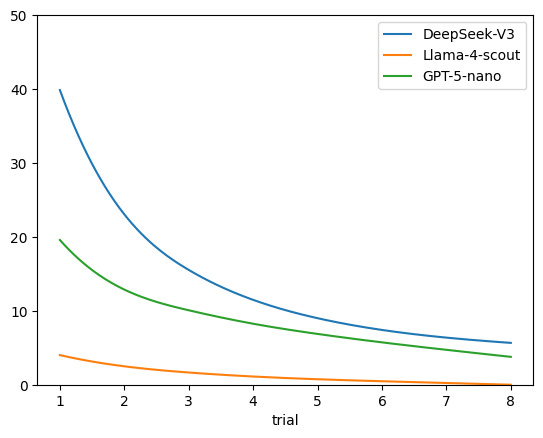

In [ ]:
labels = ['DeepSeek-V3', 'Llama-4-scout', 'GPT-5-nano']
for i, r in enumerate([r1, r2, r3]):
    xnew = np.linspace(1, len(r), 300)
    spl = make_interp_spline(range(1, len(r) + 1), r, k=3)
    smooth = spl(xnew)
    plt.plot(xnew, smooth, label=labels[i])
plt.ylim(0, 50)
plt.xlabel('trial')
plt.legend()
plt.show()

In [ ]:
data = [labels[0:1] + r1, labels[2:3] + r3, labels[1:2] + r2]
df = pd.DataFrame(data, columns=['Model'] + [f'Pass^{i}' for i in range(1,9)])
df

,Model,Pass^1,Pass^2,Pass^3,Pass^4,Pass^5,Pass^6,Pass^7,Pass^8
0,DeepSeek-V3,39.86,23.05,15.53,11.48,9.00,7.41,6.37,5.66
1,GPT-5-nano,19.58,12.87,10.07,8.25,6.87,5.73,4.72,3.77
2,Llama-4-scout,4.01,2.49,1.65,1.11,0.74,0.47,0.24,0.00


## End